In [1]:
import matplotlib.pyplot as plt
import pandas as pd

weights_to_eval = [0.0, 0.05, 0.1, 0.25, 0.5]
thresholds_to_eval = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

thresholds = []
epsilon = 0.95
d = 0.95

data = 'adult'

for w in weights_to_eval:
    temp = pd.read_csv('results/' + data + '/' + str(w) + '/test_eval/' + str(w) + '_our_threshold_bounds.csv', header=0, index_col='index')
    filtered = temp[temp['epsilons']==epsilon]
    thresholds.append(filtered.iloc[0]['threshold_bounds'])

print(thresholds)
fig, ax = plt.subplots()

plt.xlabel("RECOURSE LOSS WEIGHT")
plt.ylabel("THRESHOLD")
plt.title("THRESHOLD UPPER BOUNDS for: " + data + "\nEPSILON: " + str(epsilon) + ";  PROB: " + str(d))
string_weights = [str(x) for x in weights_to_eval]

plt.plot(string_weights, thresholds, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)



plt.show()




FileNotFoundError: [Errno 2] No such file or directory: 'results/adult/0.0/test_eval/0.0_our_threshold_bounds.csv'

thresholds:  [0.7, 0.65, 0.75, 0.8]


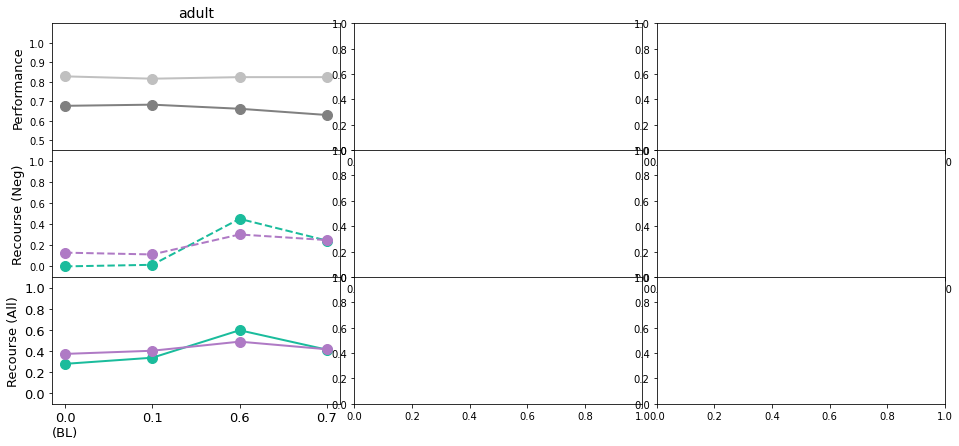

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.lines import Line2D

def get_metrics(folder, weights_to_eval, data = "compas", delta_max = 0.75, lime_kw = 0.5):
    
    f1s = []
    accuracies = []
    our_recourses, wachter_recourses = [], []
    our_flipped, wachter_flipped = [], []
    minority_recourses, white_recourses = [], []
    thresholds = []
    precisions, recalls = [], []
    for w in weights_to_eval:

        metric = "f1s"
        temp = pd.read_csv(folder + str(w) + '/test_eval/' + 'our_thresholds_test_results.csv', header=0, index_col='index')
        filtered = temp.iloc[temp[metric].argmax()]

        thresholds.append(filtered['thresholds'])
        f1s.append(filtered['f1s'])
        precisions.append(filtered['precisions'])
        accuracies.append(filtered['accuracies'])
        recalls.append(filtered['recalls'])
        
        our_recourses.append(filtered['recourse_proportion'])
        our_flipped.append(filtered['flipped_proportion'])
        
#     our_recourses.append(filtered.iloc[0]['recourse_proportion'])
    

        temp = pd.read_csv(folder + str(w) + '/test_eval/' + 'wachter_thresholds_test_results.csv', header=0, index_col='index')
        new_filtered = temp.iloc[temp[metric].argmax()]
        assert(filtered['f1s'] == new_filtered['f1s'])
        wachter_recourses.append(new_filtered['recourse_proportion']) 
        wachter_flipped.append(new_filtered['flipped_proportion'])

        
#         temp = pd.read_csv(folder + str(w) + '/test_eval/lime_eval/' + 'wachter_thresholds_test_results.csv', header=0, index_col='index')
#         new_filtered = temp.iloc[temp[metric].argmax()]
#         assert(filtered['f1s'] == new_filtered['f1s'])
#         wachter_recourses.append(new_filtered['recourse_proportion']) 
#         wachter_flipped.append(new_filtered['flipped_proportion'])
        
#         temp = pd.read_csv(folder + str(w) + '/test_eval/minority_exp/' + 'MINORITY_wachter_thresholds_test_results.csv', header=0, index_col='index')
#         filtered = temp[temp['thresholds']==thresholds[-1]]
#         minority_recourses.append(filtered.iloc[0]['recourse_proportion'])
        
#         temp = pd.read_csv(folder + str(w) + '/test_eval/minority_exp/' + 'WHITE_wachter_thresholds_test_results.csv', header=0, index_col='index')
#         filtered = temp[temp['thresholds']==thresholds[-1]]
#         white_recourses.append(filtered.iloc[0]['recourse_proportion'])
        
    return f1s, accuracies, precisions, recalls, our_recourses, wachter_recourses, our_flipped, wachter_flipped, thresholds, minority_recourses, white_recourses
    
    
weights_to_eval = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
weights_to_eval = [0.0, 0.1, 0.6, 0.7]
# thresholds_to_eval = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


fig, (axes) = plt.subplots(3, 3 ,figsize=(16,7))

fig.subplots_adjust(hspace=0, wspace = 0.05)

for data_idx, data in enumerate(['adult']):

    delta_max = 0.75    
    folder = 'results/' + data + '_' + str(delta_max) + '/'



    f1s, accuracies, precisions, recalls, our_recourses, wachter_recourses, our_flipped, wachter_flipped, thresholds, minority_recourses, white_recourses = \
        get_metrics(folder, weights_to_eval, delta_max = delta_max, data = data)

    string_weights = [str(x) + "\n(thr: " + str(thresh) + ")" for x, thresh in zip(weights_to_eval, thresholds)]

    string_weights = [str(x) + "\n(BL)" if x == 0.0 else str(x) for x, thresh in zip(weights_to_eval, thresholds)]


    wachter_color = '#AF7AC5'
    our_color = '#1ABC9C'

    ax1 = axes[0][data_idx]
    ax2 = axes[1][data_idx]
    ax3 = axes[2][data_idx]
    
    marker_size = 10
    
    ax2.plot(string_weights, our_flipped, color=our_color, marker='o', linestyle='dashed', linewidth=2, markersize=marker_size)
    ax2.plot(string_weights, wachter_flipped, color=wachter_color, marker='o', linestyle='dashed', linewidth=2, markersize=marker_size)
    ax1.plot(string_weights, accuracies, color='silver', marker='o', linestyle='solid', linewidth=2, markersize=marker_size)
    ax1.plot(string_weights, f1s, color='gray', marker='o', linestyle='solid', linewidth=2, markersize=marker_size)
    ax3.plot(string_weights, our_recourses, color=our_color, marker='o', linestyle='solid', linewidth=2, markersize=marker_size)
    ax3.plot(string_weights, wachter_recourses, color=wachter_color, marker='o', linestyle='solid', linewidth=2, markersize=marker_size)
    # plt.plot(string_weights, lime_recourses, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)


    acc = Line2D([0], [0], color='silver', linewidth=2, linestyle='solid', label = 'Accuracies')
    F1 = Line2D([0], [0], color='gray', linewidth=2, linestyle='solid', label = 'F1 scores')
    our_recourse = Line2D([0], [0], color=our_color, linewidth=2, linestyle='solid', label = 'LP, Ours (All)')
    wachter_recourse = Line2D([0], [0], color=our_color, linewidth=2, linestyle='dashed', label = 'LP, Ours (Neg)')
    our_neg_recourse = Line2D([0], [0], color=wachter_color, linewidth=2, linestyle='solid', label = 'Wachter (All)')
    wachter_neg_recourse = Line2D([0], [0], color=wachter_color, linewidth=2, linestyle='dashed', label = 'Wachter (Neg)')

    # plt.legend(handles=[F1, acc, our_recourse, our_neg_recourse, wachter_recourse, wachter_neg_recourse], fontsize = 12)

#     for idx, f1 in enumerate(f1s):
#         if f1 >= f1s[0]:
#             ax1.annotate(round(f1s[idx], 3), (string_weights[idx], f1s[idx] + 0.02))

#     ax.annotate(round(accuracies[0], 3), (string_weights[0], accuracies[0] + 0.02))

#     for idx, acc in enumerate(accuracies):
#         if acc >= accuracies[0]:
#             ax.annotate(round(accuracies[idx], 3), (string_weights[idx], accuracies[idx] + 0.02))

    print("thresholds: ", thresholds)

    # plt.ylim(0, 1.0)
#     fig.gca().set_xlabel(r'$\lambda$', fontsize=14)
    ax1.set_ylim(0.45, 1.1)
    ax2.set_ylim(-0.1, 1.1)
    ax3.set_ylim(-0.1, 1.1)

    ax1.set_title(data, fontsize=14)
    if data_idx == 0:
        ax1.set_ylabel("Performance", fontsize=13)
        ax2.set_ylabel("Recourse (Neg)", fontsize=13)
        ax3.set_ylabel("Recourse (All)", fontsize=13)
        
        ax1.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

        ax2.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax3.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

    else:
        ax1.set_yticks([])
        ax2.set_yticks([])
        ax3.set_yticks([])

    if data_idx == 1:
        ax3.set_xlabel(r'$\lambda$', fontsize=14)
        
    # plt.title(data + "\ndelta_max:" + str(delta_max))

    ax3.tick_params(axis='both', which='major', labelsize=13)


    ax1.set_xticks([]) 
    ax2.set_xticks([]) 
    
#     ax1.axvline(x=5.5/len(string_weights), color = 'gray')
#     ax2.axvline(x=5.5/len(string_weights), color = 'gray')
#     ax3.axvline(x=5.5/len(string_weights), color = 'gray')


    
plt.savefig("Adult.pdf", bbox_inches="tight")



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.lines import Line2D

def get_metrics(folder, weights_to_eval, data = "compas", delta_max = 0.75, lime_kw = 0.5):
    
    f1s = []
    accuracies = []
    our_recourses, wachter_recourses = [], []
    our_flipped, wachter_flipped = [], []
    minority_recourses, white_recourses = [], []
    thresholds = []
    precisions, recalls = [], []
    for w in weights_to_eval:

        metric = "f1s"
        temp = pd.read_csv(folder + str(w) + '/test_eval/' + 'our_thresholds_test_results.csv', header=0, index_col='index')
        filtered = temp.iloc[temp[metric].argmax()]

        thresholds.append(filtered['thresholds'])
        f1s.append(filtered['f1s'])
        precisions.append(filtered['precisions'])
        accuracies.append(filtered['accuracies'])
        recalls.append(filtered['recalls'])
        
        our_recourses.append(filtered['recourse_proportion'])
        our_flipped.append(filtered['flipped_proportion'])
        
#     our_recourses.append(filtered.iloc[0]['recourse_proportion'])
    

        temp = pd.read_csv(folder + str(w) + '/test_eval/' + 'wachter_thresholds_test_results.csv', header=0, index_col='index')
        new_filtered = temp.iloc[temp[metric].argmax()]
        assert(filtered['f1s'] == new_filtered['f1s'])
        wachter_recourses.append(new_filtered['recourse_proportion']) 
        wachter_flipped.append(new_filtered['flipped_proportion'])

        
#         temp = pd.read_csv(folder + str(w) + '/test_eval/lime_eval/' + 'wachter_thresholds_test_results.csv', header=0, index_col='index')
#         new_filtered = temp.iloc[temp[metric].argmax()]
#         assert(filtered['f1s'] == new_filtered['f1s'])
#         wachter_recourses.append(new_filtered['recourse_proportion']) 
#         wachter_flipped.append(new_filtered['flipped_proportion'])
        
#         temp = pd.read_csv(folder + str(w) + '/test_eval/minority_exp/' + 'MINORITY_wachter_thresholds_test_results.csv', header=0, index_col='index')
#         filtered = temp[temp['thresholds']==thresholds[-1]]
#         minority_recourses.append(filtered.iloc[0]['recourse_proportion'])
        
#         temp = pd.read_csv(folder + str(w) + '/test_eval/minority_exp/' + 'WHITE_wachter_thresholds_test_results.csv', header=0, index_col='index')
#         filtered = temp[temp['thresholds']==thresholds[-1]]
#         white_recourses.append(filtered.iloc[0]['recourse_proportion'])
        
    return f1s, accuracies, precisions, recalls, our_recourses, wachter_recourses, our_flipped, wachter_flipped, thresholds, minority_recourses, white_recourses
    
    
weights_to_eval = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
weights_to_eval = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# weights_to_eval = [0.0, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
weights_to_eval = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
thresholds_to_eval = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

data = 'bail'
delta_max = 0.75    
folder = 'new_results/NEW_0924_experiments/0924_' + data + '_' + str(delta_max) + '/'
    
    
    
f1s, accuracies, precisions, recalls, our_recourses, wachter_recourses, our_flipped, wachter_flipped, thresholds, minority_recourses, white_recourses = \
    get_metrics(folder, weights_to_eval, delta_max = delta_max, data = data)
    
string_weights = [str(x) + "\n(thr: " + str(thresh) + ")" for x, thresh in zip(weights_to_eval, thresholds)]

fig, ax = plt.subplots(figsize=(13,4))

wachter_color = 'mediumpurple'
our_color = 'c'

plt.plot(string_weights, our_flipped, color=our_color, marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(string_weights, wachter_flipped, color=wachter_color, marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.plot(string_weights, accuracies, color='silver', marker='o', linestyle='solid', linewidth=2, markersize=12)
plt.plot(string_weights, f1s, color='gray', marker='o', linestyle='solid', linewidth=2, markersize=12)
plt.plot(string_weights, our_recourses, color=our_color, marker='o', linestyle='solid', linewidth=2, markersize=12)
plt.plot(string_weights, wachter_recourses, color=wachter_color, marker='o', linestyle='solid', linewidth=2, markersize=12)
# plt.plot(string_weights, lime_recourses, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)


acc = Line2D([0], [0], color='silver', linewidth=2, linestyle='solid', label = 'Accuracies')
F1 = Line2D([0], [0], color='gray', linewidth=2, linestyle='solid', label = 'F1 scores')
our_recourse = Line2D([0], [0], color=our_color, linewidth=2, linestyle='solid', label = 'LP, Ours (All)')
wachter_recourse = Line2D([0], [0], color=our_color, linewidth=2, linestyle='dashed', label = 'LP, Ours (Neg)')
our_neg_recourse = Line2D([0], [0], color=wachter_color, linewidth=2, linestyle='solid', label = 'Wachter (All)')
wachter_neg_recourse = Line2D([0], [0], color=wachter_color, linewidth=2, linestyle='dashed', label = 'Wachter (Neg)')

# green_patch = mpatches.Patch(color='green', label='LIME')

# plt.legend(handles=[gray_patch, red_patch, blue_patch])
plt.legend(handles=[F1, acc, our_recourse, our_neg_recourse, wachter_recourse, wachter_neg_recourse], fontsize = 12)

ax.annotate(round(f1s[0], 3), (string_weights[0], f1s[0] + 0.02))

for idx, f1 in enumerate(f1s):
    if f1 >= f1s[0]:
        ax.annotate(round(f1s[idx], 3), (string_weights[idx], f1s[idx] + 0.02))

ax.annotate(round(accuracies[0], 3), (string_weights[0], accuracies[0] + 0.02))

for idx, acc in enumerate(accuracies):
    if acc >= accuracies[0]:
        ax.annotate(round(accuracies[idx], 3), (string_weights[idx], accuracies[idx] + 0.02))
        
        
# plt.ylim(0, 1.0)
fig.gca().set_xlabel(r'$\lambda$', fontsize=14)
plt.ylim(-0.1, 1.1)
plt.title(data + "\ndelta_max:" + str(delta_max))

ax.tick_params(axis='both', which='major', labelsize=12)

# plt.savefig(folder + data + "_" + str(delta_max) + '.pdf', bbox_inches="tight")

summed = [sum(x)/2 for x in zip(f1s, our_recourses)]
idx = np.argmax(summed)
idx = weights_to_eval.index(0.6)

print("BASELINE:")
print("LAMBDA: ", string_weights[0])
print("f1: ", f1s[0])
print("accuracy: ", accuracies[0])
print("precision: ", precisions[0])
print("recall: ", recalls[0])

print("wachter neg: ", wachter_flipped[0])
print("our neg: ", our_flipped[0])
print("wachter all: ", wachter_recourses[0])
print("our all: ", our_recourses[0])
# print("MINORITY recourse: ", minority_recourses[0])
# print("WHITE recourse: ", white_recourses[0])
# print("difference: ", white_recourses[0] - minority_recourses[0])

print("")
print("LAMBDA: ", string_weights[idx])
print("f1: ", f1s[idx])
print("accuracy: ", accuracies[idx])
print("precision: ", precisions[idx])
print("recall: ", recalls[idx])
print("wachter neg: ", wachter_flipped[idx])
print("our neg: ", our_flipped[idx])
print("wachter all: ", wachter_recourses[idx])
print("our all: ", our_recourses[idx])
# print("MINORITY recourse: ", minority_recourses[idx])
# print("WHITE recourse: ", white_recourses[idx])
# print("difference: ", white_recourses[idx] - minority_recourses[idx])

print(accuracies)
f1_diffs = []
acc_diffs = []

for i in range(1, len(f1s)):
    f1_diffs.append(f1s[0] - f1s[i])
    acc_diffs.append(accuracies[0] - accuracies[i])

print(sum(f1_diffs)/len(f1_diffs))
print(sum(acc_diffs)/len(acc_diffs))




In [ ]:
print(thresholds)

In [ ]:
import torch
import os

def load_torch_model(weight_dir, weight):
    model_name = weight_dir + str(weight) + '_best_model.pt'
    model = torch.load(model_name)
    model.eval()
    return model

def read_data(output_dir):
    """
    Reads data dataframes to csv

    :param output_dir: output directory of experiment. will look inside a subdirectory 'data'
    :returns: dictionary with data if files exist; None otherwise

    """

    data_dir = output_dir + "data/"

    if not os.path.exists(data_dir):
        return None

    data = {}

    (data['X_train']) = pd.read_csv(data_dir + 'X_train.csv', dtype=np.float64, index_col = 'index')
    (data['X_val']) = pd.read_csv(data_dir + 'X_val.csv', dtype=np.float64, index_col = 'index')
    (data['X_test']) = pd.read_csv(data_dir + 'X_test.csv', dtype=np.float64, index_col = 'index')

    (data['y_train']) = pd.read_csv(data_dir + 'y_train.csv', dtype=np.float64, index_col = 'index')['label']
    (data['y_val']) = pd.read_csv(data_dir + 'y_val.csv', dtype=np.float64, index_col = 'index')['label']
    (data['y_test']) = pd.read_csv(data_dir + 'y_test.csv', dtype=np.float64, index_col = 'index')['label']

    for x in ['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test']:
        data[x].index = data[x].index.astype(int)

    return data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.lines import Line2D
from sklearn.metrics import precision_score


# weights_to_eval = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# weights_to_eval = [0.0, 0.6, 0.7, 0.8, 0.9, 1.0]
weights_to_eval = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
weights_to_eval = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

thresholds_to_eval = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

f1s = []
minority_recourses, white_recourses = [], []
minority_flipped, white_flipped = [], []
minority_pos_proportion, white_pos_proportion = [], []
thresholds = []

lime_recourses = []

val_precisions, test_precisions = [], []

lime_kw = 0.75

d = 0.95
delta_max = 0.75
data = "compas"

folder = '/Users/alexisross/Downloads/NEW_0924_experiments/0924_' + data + '_' + str(delta_max) + '/'


for idx, w in enumerate(weights_to_eval):
    
    metric = "f1s"
    
    temp = pd.read_csv(folder + str(w) + '/test_eval/minority_exp_fixed_prec/' + 'MINORITY_wachter_thresholds_test_results.csv', header=0, index_col='index')
    filtered = temp.iloc[temp[metric].argmax()]
    current_thresh = filtered['thresholds']
    thresholds.append(filtered['thresholds'])
    
    minority_recourses.append(temp.iloc[0]['recourse_proportion'])
    minority_flipped.append(temp.iloc[0]['flipped_proportion'])
    
    temp = pd.read_csv(folder + str(w) + '/test_eval/minority_exp_fixed_prec/' + 'WHITE_wachter_thresholds_test_results.csv', header=0, index_col='index')
#     our_recourses.append(filtered.iloc[0]['recourse_proportion'])
    white_recourses.append(temp.iloc[0]['recourse_proportion'])
    white_flipped.append(temp.iloc[0]['flipped_proportion'])
  

    weight = w
    white_feature_name = "isCaucasian"

    dict_data = read_data(folder)
    model = load_torch_model(folder + str(weight) + '/', weight)

    test_data = dict_data['X_test']
    labels = dict_data['y_test']

    white_data = test_data.loc[test_data[white_feature_name] == 1]
    minority_data = test_data.loc[test_data[white_feature_name] == 0]

    white_labels = labels[labels.index.isin(white_data.index)]
    minority_labels = labels[labels.index.isin(minority_data.index)]

    data_lst = [("white", white_data, white_labels), ("minority", minority_data, minority_labels)]

    for name, test_data, labels in data_lst:
        torch_data = torch.from_numpy(test_data.values).float()
        torch_labels = torch.from_numpy(labels.values)

        y_pred = [0.0 if a < current_thresh else 1.0 for a in (model(torch_data).detach().numpy())]
        y_true = ((torch_labels).detach().numpy())
        y_prob_pred = model(torch_data).detach().numpy()

        pos_preds = np.sum(y_pred)
        neg_preds = len(y_pred) - pos_preds

        if name == "white":
            white_pos_proportion.append(round(pos_preds/len(y_pred), 3))
        else:
            minority_pos_proportion.append(round(pos_preds/len(y_pred), 3))
    
    val_data = dict_data['X_val']
    val_labels = dict_data['y_val']
    torch_data = torch.from_numpy(val_data.values).float()
    torch_labels = torch.from_numpy(val_labels.values)    
    y_pred = [0.0 if a < current_thresh else 1.0 for a in (model(torch_data).detach().numpy())]
    y_true = ((torch_labels).detach().numpy())
    
    val_precisions.append(round(precision_score(y_true, y_pred), 3))
    
    
    test_data = dict_data['X_test']
    test_labels = dict_data['y_test']
    torch_data = torch.from_numpy(test_data.values).float()
    torch_labels = torch.from_numpy(test_labels.values)    
    y_pred = [0.0 if a < current_thresh else 1.0 for a in (model(torch_data).detach().numpy())]
    y_true = ((torch_labels).detach().numpy())
    test_precisions.append(round(precision_score(y_true, y_pred), 3))
    
string_weights = [str(x) + "\n(thr: " + str(thresh) + ")" for x, thresh in zip(weights_to_eval, thresholds)]

fig, ax = plt.subplots(figsize=(12,3))


minority_color = 'forestgreen'
white_color = 'rosybrown'

ind = np.arange(len(minority_recourses))  # the x locations for the groups
width = 0.35  # the width of the bars
# rects1 = ax.bar(ind - 2*width, white_recourses, width, color = white_color,
#                 label='Men')
# rects2 = ax.bar(ind - width, minority_recourses, width, color = minority_color,
#                 label='Women')
# rects3 = ax.bar(ind, white_flipped, width, color = white_color,hatch='//', 
#                 label='Women')
# rects4 = ax.bar(ind + width, minority_flipped,  width, color = minority_color, hatch='//', 
#                 label='Women')

rects1 = ax.bar(ind -width/2, white_recourses, width, color = white_color,)
rects4 = ax.bar(ind + width/2, minority_recourses,  width, color = minority_color,)
# rects1 = ax.bar(ind -width/2, white_pos_proportion, width, color = white_color,)
# rects4 = ax.bar(ind + width/2, minority_pos_proportion,  width, color = minority_color,)


plt.title("Proportion with Recourse (All) for: " + data + "\ndelta_max: " + str(delta_max))
# plt.title("Proportion Pos Preds for: " + data + "\ndelta_max: " + str(delta_max))

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticks(ind)
ax.set_xticklabels((weights_to_eval))

fig.gca().set_xlabel(r'$\lambda$', fontsize=14)
# plt.ylabel("Proportion with Recourse", fontsize=12)


minority_patch = mpatches.Patch(color=minority_color, label='Minorities')
white_patch = mpatches.Patch(color=white_color, label='Whites')


plt.legend(handles=[minority_patch, white_patch], loc='lower right')

plt.savefig(folder + data + '_minority.pdf', bbox_inches="tight")

print("thresholds: ", thresholds)
print("val precisions: ", val_precisions)
print("test precisions: ", test_precisions)


In [ ]:


# load and process data
adult_df = pd.read_csv("data/adult.csv").reset_index(drop=True)
adult_df = adult_df.dropna()

adult_df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',\
                                              'capital-gain','capital-loss','hours-per-week','native-country','label']

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

weights_to_eval = [0.0, 0.1, 0.15, 0.25, 0.5]
thresholds_to_eval = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

f1s, accuracies = [], []
recourse_proportions = []
flipped_proportions = []
thresholds = []
precisions = []
recalls = []

lime_kw = 0.75

d = 0.95
delta_max = 0.75
data = "bail"

folder = '/Users/alexisross/Downloads/test_nlp/new/'

for idx, w in enumerate(weights_to_eval):
    
    metric = "f1s"
    temp = pd.read_csv(folder + str(w) + "/" + str(w) + '_val_thresholds_info.csv', header=0, index_col='index')
    filtered = temp.iloc[temp[metric].argmax()]
    thresholds.append(filtered['thresholds'])
    recourse_proportions.append(filtered['recourse_proportion'])
    flipped_proportions.append(filtered['flipped_proportion'])
    f1s.append(filtered['f1s'])
    accuracies.append(filtered['accs'])
    precisions.append(filtered['precisions'])
    recalls.append(filtered['recalls'])
    

print(recourse_proportions)
    
    
string_weights = [str(x) + "\n(thr: " + str(thresh) + ")" for x, thresh in zip(weights_to_eval, thresholds)]
string_weights = [str(x) for x in weights_to_eval]

fig, ax = plt.subplots(figsize=(6,3))


plt.plot(string_weights, f1s, color='gray', marker='o', linestyle='solid', linewidth=2, markersize=12)
plt.plot(string_weights, accuracies, color='silver', marker='o', linestyle='solid', linewidth=2, markersize=12)
plt.plot(string_weights, recourse_proportions, color='c', marker='o', linestyle='solid', linewidth=2, markersize=12)
plt.plot(string_weights, flipped_proportions, color='c', marker='o', linestyle='dashed', linewidth=2, markersize=12)

fig.gca().set_xlabel(r'$\lambda$', fontsize=14)
# plt.ylabel("Recourse / F1 / Acc")

acc = Line2D([0], [0], color='silver', linewidth=2, linestyle='solid', label = 'Accuracies')
F1 = Line2D([0], [0], color='gray', linewidth=2, linestyle='solid', label = 'F1 scores')
recourse = Line2D([0], [0], color='c', linewidth=2, linestyle='solid', label = 'Recourse (All)')
flipped = Line2D([0], [0], color='c', linewidth=2, linestyle='dashed', label = 'Recourse (Neg)')

# green_patch = mpatches.Patch(color='green', label='LIME')

# plt.legend(handles=[gray_patch, red_patch, blue_patch])
plt.legend(handles=[F1, acc, recourse, flipped], fontsize = 12)
plt.ylim(-0.1, 1.1)

ax.tick_params(axis='both', which='major', labelsize=12)

plt.savefig(folder + 'nlp.pdf', bbox_inches="tight")

print("BASELINE:")
print("LAMBDA: ", string_weights[0])
print("threshold: ", thresholds[0])
print("f1: ", f1s[0])
print("accuracy: ", accuracies[0])
print("precision: ", precisions[0])
print("recall: ", recalls[0])

print("neg: ", flipped_proportions[0])
print("all: ", recourse_proportions[0])


print("")
idx =3
print("LAMBDA: ", string_weights[idx])
print("BASELINE:")
print("LAMBDA: ", string_weights[idx])
print("threshold: ", thresholds[idx])

print("f1: ", f1s[idx])
print("accuracy: ", accuracies[idx])
print("precision: ", precisions[idx])
print("recall: ", recalls[idx])

print("neg: ", flipped_proportions[idx])
print("all: ", recourse_proportions[idx])


In [ ]:
import numpy as np



# load and process data
adult_df = pd.read_csv("data/adult.csv").reset_index(drop=True)
adult_df = adult_df.dropna()

adult_df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',\
                                              'capital-gain','capital-loss','hours-per-week','native-country','label']

adult_df['isWhite'] = adult_df.apply(lambda row: 1 if 'White' in row['race'] else 0, axis=1)

white_indices = list(np.where(adult_df["isWhite"]==1)[0])
minority_indices = list(np.where(adult_df["isWhite"]==0)[0])


In [ ]:
# load and process data
adult_df = pd.read_csv("data/adult.csv").reset_index(drop=True)
adult_df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex',\
                                          'capital-gain','capital-loss','hours-per-week','native-country','label']

adult_df = adult_df.dropna()
adult_df['native-country-United-States'] = adult_df.apply(lambda row: 1 if 'United-States' in row['native-country'] else 0, axis=1)
adult_df['marital-status-Married'] = adult_df.apply(lambda row: 1 if 'Married' in row['marital-status'] else 0, axis=1)
adult_df['isMale'] = adult_df.apply(lambda row: 1 if 'Male' in row['sex'] else 0, axis=1)
adult_df = adult_df.drop(['native-country', 'marital-status', 'relationship'], axis=1)

adult_df.columns = adult_df.columns.str.replace(' ', '')
adult_df = adult_df.drop(['fnlwgt', 'education', 'occupation'], axis=1)
adult_X = adult_df.drop('label', axis=1)
adult_X = adult_X.drop(['workclass', 'race', 'sex'], axis=1)
adult_y = adult_df['label'].replace(' <=50K', 0.0)
adult_y = adult_y.replace(' >50K', 1.0)

# define the categorical features
adult_categorical_features = [5, 6, 7]

adult_X.columns = adult_X.columns.str.replace("_", "-")

columns = adult_X.columns
adult_categorical_names = [columns[i] for i in adult_categorical_features] 

# normalize continuous features
for col in adult_X.columns:
    if col not in adult_categorical_names:
        adult_X[col] = (adult_X[col] - adult_X[col].mean(axis=0)) / adult_X[col].std(axis=0)


adult_actionable_indices = [1, 2, 4]



In [ ]:
from data_utils import *

adult_experiment_dir = 'new_results/0815_adult/'
adult_X, adult_y, adult_actionable_indices, adult_categorical_features, adult_categorical_names = process_adult_data()
adult_data = read_data(adult_experiment_dir)

In [ ]:
display(adult_data['X_train'])

In [ ]:
print(type(white_indices[0]))


In [ ]:
import matplotlib
(matplotlib.colors.to_rgb('forestgreen'))


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.lines import Line2D
from sklearn.metrics import precision_score


weights_to_eval = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

lime_kw = 0.75

d = 0.95
delta_max = 0.75

adult_color = "green"
bail_color = "blue"
compas_color = "red"

fig, axes = plt.subplots(1, 3, figsize=(9,3.5), constrained_layout=True)

def get_minority_plot():
    for i, (data, white_feature_name, color) in enumerate([("adult", "isWhite", adult_color), ("bail", "WHITE", bail_color), ("compas", "isCaucasian", compas_color)]):

        ax = axes[i]
        f1s = []
        folder = '/Users/alexisross/Downloads/NEW_0924_experiments/0924_' + data + '_' + str(delta_max) + '/'

        minority_recourses, white_recourses = [], []
        minority_flipped, white_flipped = [], []
        minority_pos_proportion, white_pos_proportion = [], []    
        thresholds = []
        test_pos_proportion, val_pos_proportion = [], []
        test_precisions, val_precisions = [], []
        for idx, w in enumerate(weights_to_eval):

            temp = pd.read_csv(folder + str(w) + '/test_eval/minority_exp_fixed_prec/' + 'MINORITY_our_thresholds_test_results.csv', header=0, index_col='index')
            assert len(temp) == 1
            filtered = temp.iloc[temp["thresholds"].argmax()]
            

            current_thresh = filtered['thresholds']
            thresholds.append(round(filtered['thresholds'], 3))

            minority_recourses.append(round(temp.iloc[0]['recourse_proportion'], 3))
            minority_flipped.append(temp.iloc[0]['flipped_proportion'])

            temp = pd.read_csv(folder + str(w) + '/test_eval/minority_exp_fixed_prec/' + 'WHITE_our_thresholds_test_results.csv', header=0, index_col='index')
            white_recourses.append(round(temp.iloc[0]['recourse_proportion'], 3))
            white_flipped.append(temp.iloc[0]['flipped_proportion'])

            weight = w
            
            dict_data = read_data(folder)
            model = load_torch_model(folder + str(weight) + '/', weight)

            test_data = dict_data['X_test']
            labels = dict_data['y_test']

            white_data = test_data.loc[test_data[white_feature_name] == 1]
            minority_data = test_data.loc[test_data[white_feature_name] == 0]

            white_labels = labels[labels.index.isin(white_data.index)]
            minority_labels = labels[labels.index.isin(minority_data.index)]

            data_lst = [("white", white_data, white_labels), ("minority", minority_data, minority_labels)]

            for name, test_data, labels in data_lst:
                torch_data = torch.from_numpy(test_data.values).float()
                torch_labels = torch.from_numpy(labels.values)

                y_pred = [0.0 if a < current_thresh else 1.0 for a in (model(torch_data).detach().numpy())]
                y_true = ((torch_labels).detach().numpy())
                y_prob_pred = model(torch_data).detach().numpy()

                pos_preds = np.sum(y_pred)
                neg_preds = len(y_pred) - pos_preds

                if name == "white":
                    white_pos_proportion.append(round(pos_preds/len(y_pred), 3))
                else:
                    minority_pos_proportion.append(round(pos_preds/len(y_pred), 3))

            torch_data = torch.from_numpy(dict_data['X_test'].values).float()
            torch_labels = torch.from_numpy(dict_data['y_test'].values)

            y_pred = [0.0 if a < current_thresh else 1.0 for a in (model(torch_data).detach().numpy())]
            y_true = ((torch_labels).detach().numpy())
            y_prob_pred = model(torch_data).detach().numpy()
            test_pos_proportion.append(round(np.sum(y_pred)/len(y_pred), 3))
            test_precisions.append(round(precision_score(y_true, y_pred), 3))

            
            torch_data = torch.from_numpy(dict_data['X_val'].values).float()
            torch_labels = torch.from_numpy(dict_data['y_val'].values)

            y_pred = [0.0 if a < current_thresh else 1.0 for a in (model(torch_data).detach().numpy())]
            y_true = ((torch_labels).detach().numpy())
            y_prob_pred = model(torch_data).detach().numpy()
            val_pos_proportion.append(round(np.sum(y_pred)/len(y_pred), 3))
            val_precisions.append(round(precision_score(y_true, y_pred), 3))

            
        string_weights = ["(BL)" if x == 0.0 else str(x) for x, thresh in zip(weights_to_eval, thresholds)]

        recourse_differences = [white_recourses[i] - minority_recourses[i] for i in range(len(white_recourses))]
        pos_proportion_differences = [white_pos_proportion[i] - minority_pos_proportion[i] for i in range(len(white_pos_proportion))]
        flipped_proportion_differences = [white_flipped[i] - minority_flipped[i] for i in range(len(white_flipped))]
        
#         fig, ax = plt.subplots(figsize=(12,3))


        minority_color = 'forestgreen'
        white_color = 'rosybrown'

        ind = np.arange(len(minority_recourses))  # the x locations for the groups
        width = 0.35  # the width of the bars
        ax.set_ylim(-0.15, 0.3)

        plot_lst = recourse_differences
        
        colors = ["#E98560" if x > 0 else '#1ABC9C' for x in plot_lst]
        ax.bar(string_weights, plot_lst, color=colors)
        ax.axhline(y=plot_lst[0], color='black', linestyle='-', lw=1)
        ax.tick_params(axis='both', which='major', labelsize=13)

        if i != 0:
            ax.set_yticks([])

        xticks = ax.xaxis.get_major_ticks()
        ax.set_xlabel(r'$\lambda$', fontsize=16, labelpad=-10)
        for idx in range(1, len(xticks)):
            xticks[idx].set_visible(False)


            
        xticks = ["BL" if x == 0.0 else "" for x in weights_to_eval]
        print(xticks)
        ax.set_title(data, fontsize=16)
#         plt.plot(string_weights, recourse_differences, color=color, marker='o', linestyle='solid', linewidth=2, markersize=12)


#         plt.title("Proportion with Recourse (All) for: " + data + "\ndelta_max: " + str(delta_max))
#         # plt.title("Proportion Pos Preds for: " + data + "\ndelta_max: " + str(delta_max))

#         ax.tick_params(axis='both', which='major', labelsize=12)
#         ax.set_xticks(ind)
#         ax.set_xticklabels((weights_to_eval))

#         fig.gca().set_xlabel(r'$\lambda$', fontsize=14)
#         # plt.ylabel("Proportion with Recourse", fontsize=12)


#         minority_patch = mpatches.Patch(color=minority_color, label='Minorities')
#         white_patch = mpatches.Patch(color=white_color, label='Whites')


#         plt.legend(handles=[minority_patch, white_patch], loc='lower right')

#         plt.savefig(folder + data + '_minority.pdf', bbox_inches="tight")

#         print("thresholds: ", thresholds)
#         print("val precisions: ", val_precisions)
#         print("test precisions: ", test_precisions)

#         ax.set_title(data, fontsize=14)
        print("data: ", data)
        print("lambdas: ", weights_to_eval)
        print("thresholds (fixing val prec = 0.65): ", thresholds)
        print("val precisions: ", val_precisions)
        print("overall pos proportion on val: ", val_pos_proportion)
        print("test precisions: ", test_precisions)
        print("overall pos proportion on test: ", test_pos_proportion)
        print("test white_pos_proportion: ", white_pos_proportion)
        print("test minority_pos_proportion: ", minority_pos_proportion)
        print("test white recourse proportion (all): ", white_recourses)
        print("test minority recourse proportion (all): ", minority_recourses)
        print("differences: ", recourse_differences)
        print("")

get_minority_plot()
fig.tight_layout() 
fig.subplots_adjust(hspace = 0.1)

plt.savefig('minority.pdf', bbox_inches="tight")
# fig.suptitle("Recourse Proportion Differences between Whites and Minorities")


In [ ]:
from utils import *
from data_utils import *
import matplotlib.pyplot as plt

thresholds = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
w = 0.6
data = "compas"
delta_max = 0.75

fig, axes = plt.subplots(3, 1, figsize=(9.5,6), constrained_layout=True)


for i, data in enumerate(["adult", "bail", "compas"]):
    print(data)
    flipped = []
    precisions = []
    recourses = []
    f1s = []
    recalls = []
    accs = []
    
    if data == "bail":
        _, _, actionable_indices, _, _ = process_bail_data()
    elif data == "compas":
        _, _, actionable_indices, _, _ = process_compas_data()
    else:
        _, _, actionable_indices, _, _ = process_adult_data()
    print("actionable indices: ", actionable_indices)
        
    
        
    ax = axes[i]
    weight = w

    folder = '/Users/alexisross/Downloads/NEW_0924_experiments/0924_' + data + '_' + str(delta_max) + '/'
    file_name = folder + str(weight) + "/test_eval/stats_by_threshold.csv"
    dict_data = read_data(folder)
    model = load_torch_model(folder + str(weight) + '/', weight)
    for t in thresholds:
    
        data_indices = range(0, 500)
#         data_indices = None

        model_dir = folder + str(w) + "/"
        flipped_proportion, precision, recourse_fraction, f1, recall, acc = our_evaluate(model, dict_data['X_test'], dict_data['y_test'], weight, t, delta_max, data_indices, actionable_indices, model_dir, do_print_individual_files = False, file_name = file_name)
        flipped.append(flipped_proportion)
        precisions.append(precision)
        recourses.append(recourse_fraction)
        f1s.append(f1)
        accs.append(acc)
        recalls.append(recall)

    thresholds_data = {}
    thresholds_data['thresholds'] = thresholds
    thresholds_data['f1s'] = f1s
    thresholds_data['accuracies'] = accs
    thresholds_data['precisions'] = precisions
    thresholds_data['recalls'] = recalls
    thresholds_data['flipped_proportion'] = flipped
    thresholds_data['recourse_proportion'] = recourses

    thresholds_df = pd.DataFrame(data=thresholds_data)
    thresholds_df.to_csv(file_name, index_label='index')
    

    str_thresholds = [str(t) for t in thresholds]
    
    print(thresholds)
    print("accs: ", accs)
    print("f1s: ", f1s)

    ax.plot(str_thresholds, f1s, color='gray', marker='o', linestyle='solid', linewidth=2, markersize=10)
    ax.plot(str_thresholds, accs, color='silver', marker='o', linestyle='solid', linewidth=2, markersize=10)
    ax.plot(str_thresholds, recourses, color='c', marker='o', linestyle='solid', linewidth=2, markersize=10)
    ax.plot(str_thresholds, flipped, color='lightblue', marker='o', linestyle='solid', linewidth=2, markersize=10)

    # plt.title(r'$\lambda$', fontsize=14)
    if i == 2:
        ax.set_xlabel("Threshold (" + r'$\theta_0$)',   fontsize=14)

    if i != 2:
        ax.set_xticks([])
        
    ax.set_ylabel(data, fontsize=14, labelpad=0)

fig.savefig('/Users/alexisross/Downloads/NEW_0924_experiments/' + str(w) + '_metrics_by_thresh.pdf', bbox_inches="tight")


In [2]:
from utils import *
from data_utils import *
import matplotlib.pyplot as plt



delta_max = 0.75

adult_X, adult_y, adult_actionable_indices, adult_categorical_features, adult_categorical_names = process_adult_data()
adult_experiment_dir = '/Users/alexisross/Downloads/NEW_0924_experiments/0924_adult_' + str(delta_max) + '/'

adult_data = get_data(adult_X, adult_y)
#write_data(adult_data, adult_experiment_dir)

adult_data = read_data(adult_experiment_dir)

weights = [0.0]
run(adult_data, adult_actionable_indices, adult_categorical_features, adult_experiment_dir, weights, delta_max, do_train = False)




WEIGHT:  0.0
[-0.04263978  1.1347612   0.30430091 -0.21665968 -0.03542945  1.
  1.          0.          1.        ]
RUNNING EVALUTE
THRESHOLDS:  [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
THR:  0.55
DONE EVALUATING FOR WEIGHT:  0.0
